In [1]:
## **LOAD PACKAGES**

import pandas as pd
import os
from datetime import datetime
import numpy as np

#Sometimes I will use R functions (those I believe are the best ones)
# Load in the r magic
%load_ext rpy2.ipython

In [2]:
#load treated and aggregated datas
df = pd.read_csv('data/eng_data.csv') 
df_topic = pd.read_csv('data/topic_data.csv') 

In [3]:
print(df.shape)

(9860, 20)


In [4]:
df_topic.head()

,url_title,Topic
0,saw-liked-2017-part-3,0
1,not-deep-learning-learning-represent,0
2,a-weird-introduction-to-deep-learning,0
3,saw-liked-2017,0
4,saw-open-data-science-conference-europe-2017,0


In [5]:
df = pd.merge(df, df_topic, on = 'url_title', how = 'left')

In [6]:
#topics in other languages
df[df.Topic.isnull()].head(2)

,Page Title,Sessions,Avg. Time on Page,Bounce Rate,Page Views,Unique Page Views,Users,url_title,content,title,...,month,mobile,tablet,(direct),goog,nkedin,t.co,spain,united states,Topic
1078,predicting regional economic indices - bbva da...,3.0,11,0.6667,3.0,3.0,3.0,bbva-da-won-best-paper-award-in-data-science-c...,\nit’s not unusual for people to complain abou...,predicting regional economic indices,...,2,0,0,0,1,0,0,0,0,NaN
1079,predicting regional economic indices - bbva da...,2.0,0,1.0000,2.0,2.0,2.0,bbva-da-won-best-paper-award-in-data-science-c...,\nit’s not unusual for people to complain abou...,predicting regional economic indices,...,2,0,0,0,1,0,0,0,0,NaN


In [7]:
df_notnull = df[~df.isnull()]

In [8]:
topic_user = df_notnull.groupby('Topic')['Users'].sum()/df_notnull['Users'].sum()
topic_unique_page_views = df_notnull.groupby('Topic')['Unique Page Views'].sum()/df_notnull['Unique Page Views'].sum()
topic_page_views = df_notnull.groupby('Topic')['Page Views'].sum()/df_notnull['Page Views'].sum()
Avg_Time_Page = df_notnull.groupby('Topic')['Avg. Time on Page'].sum()/df_notnull['Avg. Time on Page'].sum()
topic_user = topic_user.reset_index()
topic_unique_page_views = topic_unique_page_views.reset_index()
topic_page_views = topic_page_views.reset_index()
Avg_Time_Page = Avg_Time_Page.reset_index()

In [9]:
topic_user

,Topic,Users
0,0.0,0.113543
1,1.0,0.311047
2,2.0,0.042029
3,3.0,0.048786
4,4.0,0.173030
5,5.0,0.103359
6,6.0,0.059487


In [10]:
%%R 

#functions of R created by me and use it in this notebook: in Rgraphs.R - loaded before
bar_plot <- function(dataset, var, siz = 15, title = ''){
    require(forcats)
    require(ggplot2)
    require(data.table)
    require(tidyquant)
    dataset_copy = copy(dataset)
    names(dataset_copy) <- c('var', 'val')
    d <- ggplot(dataset_copy, aes(x = reorder(factor(var),val), y = val)) + geom_bar(stat="identity") + coord_flip()
    d <- d + ylab(var) + xlab('Frequency') 
    d <- d + theme_tq() 
    d <- d + theme(axis.title.y = element_text(size = rel(1.5)))
    d <- d + theme(axis.text.y = element_text(size = rel(1.8)))
    d <- d + theme(axis.text.x = element_text(size = rel(1.8)))
    d <- d + theme(axis.title.x = element_text(size = rel(1.5)))
    d <- d + theme(legend.text = element_text(size = siz))
    d <- d + theme(legend.title = element_text(size = siz))
    d <- d +  theme(
        panel.background = element_rect(fill="white") ,
        panel.grid.minor.y = element_line(size=3),
        panel.grid.major = element_line(colour = "lightgray"),
        plot.background = element_rect(fill="white")
      )

    d <- d + ggtitle(title)
    return(d)
}

R[write to console]: Loading required package: forcats

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: data.table

R[write to console]: Loading required package: tidyquant

R[write to console]: Loading required package: lubridate

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


R[write to console]: The following object is masked from ‘package:base’:

    date


R[write to console]: Loading required package: PerformanceAnalytics

R[write to console]: Loading required package: xts

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: 
Attaching package: ‘xts’


R[write to console]: The fo

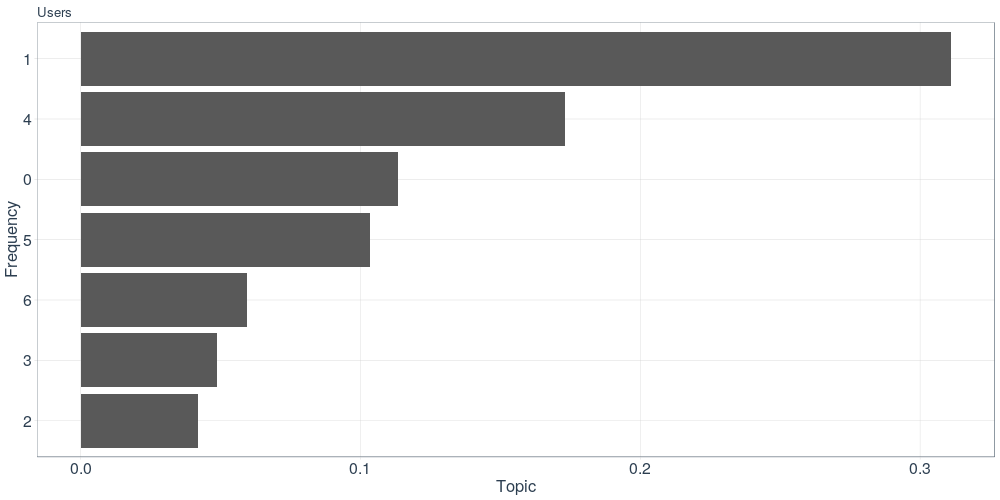

In [11]:
%%R -i topic_user -w 1000 -h 500 -u px
bar_plot(topic_user, 'Topic', title = 'Users')

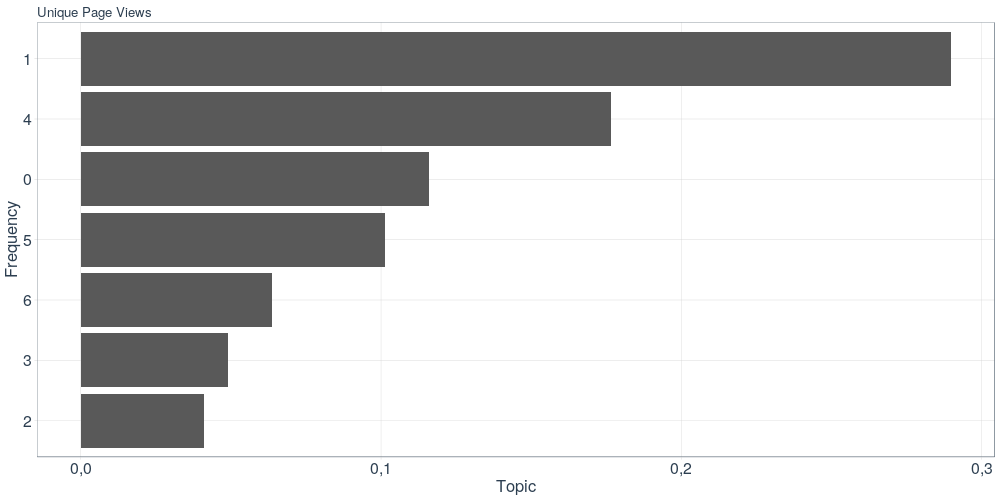

In [12]:
%%R -i topic_unique_page_views -w 1000 -h 500 -u px
bar_plot(topic_unique_page_views, 'Topic', title = 'Unique Page Views')

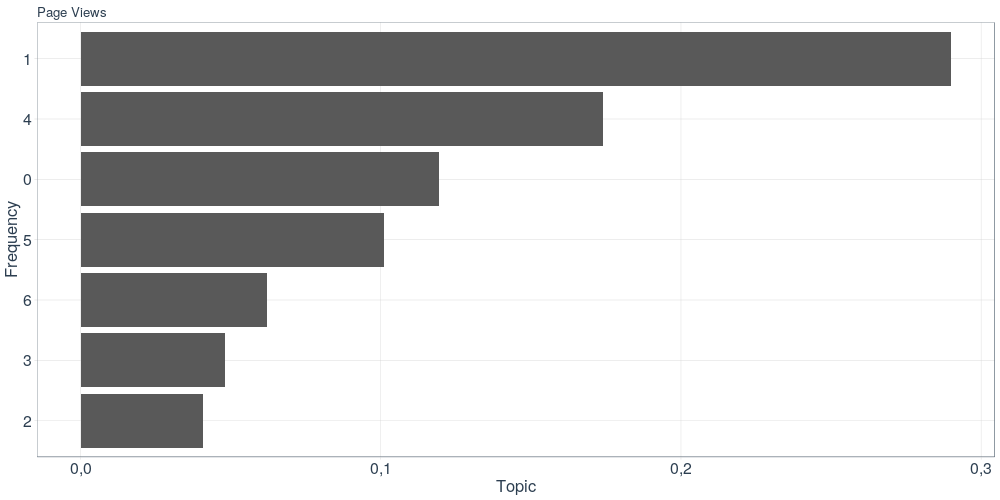

In [13]:
%%R -i topic_page_views -w 1000 -h 500 -u px
bar_plot(topic_page_views, 'Topic', title = 'Page Views')

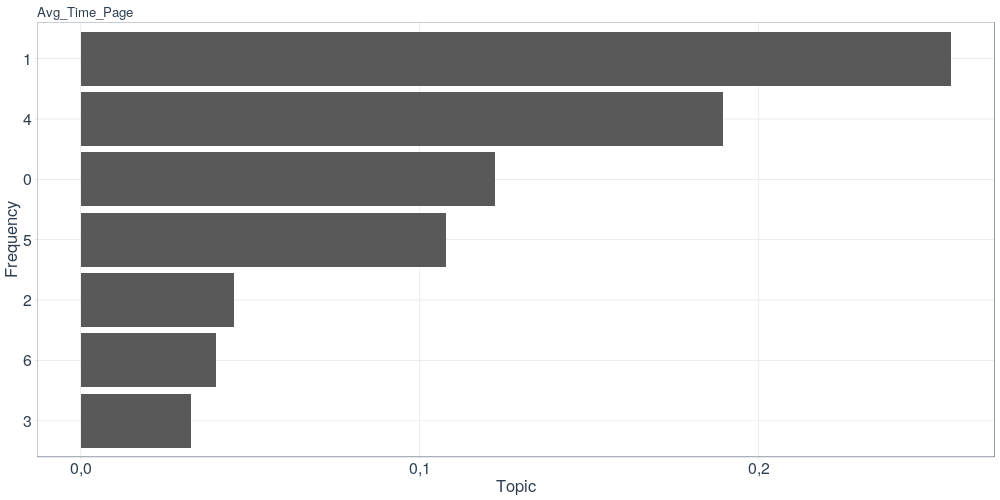

In [14]:
%%R -i Avg_Time_Page -w 1000 -h 500 -u px
bar_plot(Avg_Time_Page, 'Topic', title = 'Avg_Time_Page')

In [15]:
#topics in other languages
df["Topic"] = pd.to_numeric(df.Topic, errors='coerce').fillna(7).astype(int)
#one hot encoding of topic
df_topic = pd.get_dummies(df['Topic'],drop_first=True, prefix='Topic')
# concatenate data.frames
frames = [df, df_topic]
df = pd.concat(frames, axis = 1) #, sort= True
df = df.drop(columns = ['Topic'])

In [16]:
#missing
missing = (df.isnull().sum(axis = 0)/df.shape[0])*100
missing = missing.apply(pd.to_numeric)
missing= pd.DataFrame(missing)
missing

,0
Page Title,0.0
Sessions,0.0
Avg. Time on Page,0.0
Bounce Rate,0.0
Page Views,0.0
Unique Page Views,0.0
Users,0.0
url_title,0.0
content,0.0
title,0.0


In [17]:
df.columns

Index(['Page Title', 'Sessions', 'Avg. Time on Page', 'Bounce Rate',
       'Page Views', 'Unique Page Views', 'Users', 'url_title', 'content',
       'title', 'content_length', 'month', 'mobile', 'tablet', '(direct)',
       'goog', 'nkedin', 't.co', 'spain', 'united states', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7'],
      dtype='object')

In [18]:
df['Avg_Time_Page'] = df['Avg. Time on Page']
df = df.drop(columns = ['Avg. Time on Page'])

In [19]:
df = df.select_dtypes(include=[np.int, np.float])

## **DISTRIBUTION OF Avg. Time on Page**

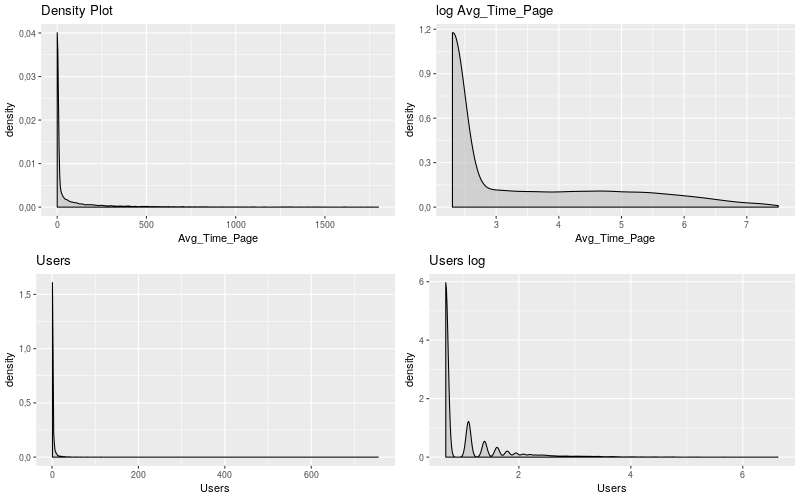

In [20]:
%%R -i df -w 800 -h 500 -u px
require(ggplot2)
x1 = ggplot(df, aes(x=Avg_Time_Page)) + geom_density(fill = 'gray', alpha = .6) + 
  labs(title="Density Plot", x="Avg_Time_Page")

x2 = ggplot(df, aes(x=log(Avg_Time_Page +10))) + geom_density(fill = 'gray', alpha = .6) + 
  labs(title="Density Plot", x="Avg_Time_Page") + ggtitle('log Avg_Time_Page')
    
x3 = ggplot(df, aes(x= Users )) + geom_density(fill = 'gray', alpha = .6) + 
  labs(title="Density Plot", x="Users") + ggtitle('Users')
    
x4 = ggplot(df, aes(x= log(Users +1))) + geom_density(fill = 'gray', alpha = .6) + 
  labs(title="Density Plot", x="Users") + ggtitle('Users log')

gridExtra::grid.arrange(x1, x2, x3, x4, ncol=2)  

## **Eliminate correlated columns**

In [21]:
df = df.drop(columns = ['Unique Page Views', 'Users'])

In [22]:
df['log_Avg_Time_Page'] = np.log(df['Avg_Time_Page'] + 10)
df.head()

,Sessions,Bounce Rate,Page Views,content_length,month,mobile,tablet,(direct),goog,nkedin,t.co,spain,united states,Avg_Time_Page,log_Avg_Time_Page
0,47.0,0.8511,64.0,15966,6,1,0,1,0,0,0,1,0,339,5.855072
1,19.0,0.7368,30.0,15966,6,0,0,1,0,0,0,1,0,698,6.562444
2,14.0,1.0000,14.0,15966,6,1,0,0,0,0,1,1,0,0,2.302585
3,13.0,0.8462,16.0,15966,6,0,0,0,0,1,0,1,0,685,6.543912
4,9.0,0.8889,13.0,15966,6,0,0,0,1,0,0,0,1,192,5.308268


In [23]:
df = df.drop(columns = ['Avg_Time_Page'])

In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
test_y = test['log_Avg_Time_Page'] 
test = test.drop(columns = ['log_Avg_Time_Page'])
train_y_XX = train['log_Avg_Time_Page'] 
train_XX = train.drop(columns = ['log_Avg_Time_Page'])

In [25]:
print(test.shape)
print(train.shape)

(1972, 13)
(7888, 14)


In [26]:
train.to_csv(r'data/H20_train_data.csv', index = False)
test.to_csv(r'data/H20_test_data.csv', index = False)
test_y.to_csv(r'data/H20_test_y.csv', index = False)
train_XX.to_csv(r'data/H20_train_xx.csv', index = False)
train_y_XX.to_csv(r'data/H20_train_y_XX.csv', index = False)

/home/erikapat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/erikapat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [27]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
train_h2o = h2o.import_file('data/H20_train_data.csv')
test_h2o = h2o.import_file('data/H20_test_data.csv')
y_test_h2o = h2o.import_file('data/H20_test_y.csv')
train = h2o.import_file('data/H20_train_xx.csv')
train_y = h2o.import_file('data/H20_train_y_XX.csv')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,23 hours 33 mins
H2O cluster timezone:,Europe/Madrid
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,2 months and 14 days
H2O cluster name:,H2O_from_python_erikapat_xs4wkf
H2O cluster total nodes:,1
H2O cluster free memory:,2.670 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [28]:
type(test_h2o)

h2o.frame.H2OFrame

In [29]:
y = "log_Avg_Time_Page"
x = df.drop(columns = ['log_Avg_Time_Page']).columns.tolist()

In [30]:
x

['Sessions',
 'Bounce Rate',
 'Page Views',
 'content_length',
 'month',
 'mobile',
 'tablet',
 '(direct)',
 'goog',
 'nkedin',
 't.co',
 'spain',
 'united states']

In [31]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x = x, y = y, training_frame = train_h2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [32]:
lb = aml.leaderboard
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20191107_114356,0.860896,0.927845,0.860896,0.572707,0.182572
XGBoost_grid_1_AutoML_20191107_114356_model_2,0.861591,0.928219,0.861591,0.566519,0.182134
StackedEnsemble_AllModels_AutoML_20191107_114356,0.862173,0.928533,0.862173,0.573316,0.182657
XGBoost_3_AutoML_20191107_114356,0.864418,0.929741,0.864418,0.574811,0.182511
XGBoost_grid_1_AutoML_20191107_114356_model_1,0.867584,0.931442,0.867584,0.580334,0.182972
GBM_5_AutoML_20191107_114356,0.869799,0.93263,0.869799,0.586355,0.183684
GBM_2_AutoML_20191107_114356,0.878057,0.937047,0.878057,0.581386,0.184473
GBM_1_AutoML_20191107_114356,0.879268,0.937693,0.879268,0.581628,0.184522
GBM_3_AutoML_20191107_114356,0.886639,0.941615,0.886639,0.582153,0.185472
GBM_4_AutoML_20191107_114356,0.897376,0.947299,0.897376,0.588042,0.186461


In [33]:
#aml@leader

In [34]:
test_h2o.shape

(1972, 13)

In [35]:
#predict and save
preds = aml.predict(test_h2o)
h2o.save_model(aml.leader, path = "./Pred_Model")

stackedensemble prediction progress: |████████████████████████████████████| 100%


'/home/erikapat/Dropbox/PRUEBAS_DATA_SCIENCE/BBVA/Pred_Model/StackedEnsemble_BestOfFamily_AutoML_20191107_114356'

In [36]:
preds.shape

(1972, 1)

In [37]:
test_y = test_y.to_frame()

In [38]:
test_y.head()

,log_Avg_Time_Page
5156,5.616771
461,2.302585
7236,5.529429
731,3.496508
9360,5.356586


In [39]:
preds = preds.as_data_frame()
preds.head()

,predict
0,4.974035
1,3.385950
2,4.753846
3,3.224854
4,3.454014


In [40]:
# Plot
from numpy  import array
import matplotlib.pyplot as plt
plt.scatter(array(test_y), array(preds), alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

In [41]:
print(preds.shape)
type(preds)

(1972, 1)


pandas.core.frame.DataFrame

In [42]:
print(test_y.shape)
type(test_y)

(1972, 1)


pandas.core.frame.DataFrame

In [43]:
preds=list(preds['predict'])
test_y=list(test_y['log_Avg_Time_Page'])

In [44]:
def error_comparison(y_predict, y_Train, method = 'Ridge', data_t = 'training'):
    
    #transform
    y_predict = np.exp(y_predict) -10
    y_Train = np.exp(y_Train) -10
    
    
    error=0
    mae_sum = 0
    mse_sum = 0
    for i in range(len(y_Train)):
        mae_sum += abs(y_Train[i]-y_predict[i])
        error+=(abs(y_Train[i]-y_predict[i])/y_predict[i])
        mse_sum += (y_Train[i]-y_predict[i])**2
    train_error_ridge= 100 - error/len(y_Train)*100
    mae = mae_sum/len(y_Train)
    rmse = np.sqrt(mse_sum/len(y_Train))
    #print(data_t + " error = "'{}'.format(train_error_ridge)+" mape percent in " + method + " Regression")
    print(data_t + " error = "'{}'.format(mae)+" mae in " + method + "Regression")
    print(data_t + " error = "'{}'.format(rmse)+" rmse in " + method + "Regression")

    return train_error_ridge, mae, rmse

In [45]:
H20 = error_comparison(preds, test_y, method = 'H20', data_t = 'test')

test error = 67.61272952085284 mae in H20Regression
test error = 191.65899203286992 rmse in H20Regression


In [46]:
preds = aml.predict(train)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [47]:
preds = preds.as_data_frame()
train_y = train_y.as_data_frame()

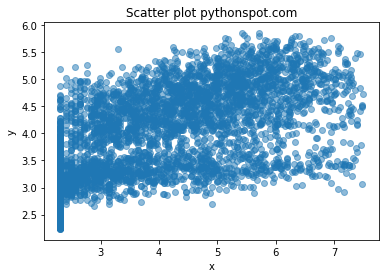

In [48]:
# Plot
from numpy  import array
import matplotlib.pyplot as plt
plt.scatter(array(train_y), array(preds), alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [49]:
preds=list(preds['predict'])
train_y = list(train_y['C1'])

In [50]:
H20 = error_comparison(preds, train_y, method = 'H20', data_t = 'train')

train error = 67.72660850557324 mae in H20Regression
train error = 197.06747717226975 rmse in H20Regression
